# BigMart Assignment

The python code given below is an attempt to predict the sales of products on different BigMart stores based on the previous sales data. We have the dataset already split into 2 files i.e. train_v9rqX0R.csv & test_AbJTz2I.csv.

The sequence followed in the code is - 
1. Data Cleaning (blank rows, checking datetime format, removing duplicates)
2. EDA (checking outliers, correlation matrix, scaling, encoding, missing values, etc.)
3. Feature Engineering (Creating or Combining Feature)
4. Model Fitting
5. Hyper Parameter Tuning
6. Bagging/Boosting
7. Conclusion
8. Recommendations


## Import Libraries

In [78]:
import pandas as pd
import seaborn as sns

## 1. Data Cleaning

### 1.1. Checking

In [79]:
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [80]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [81]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [82]:
# Checking data types
print("Train Data Types before conversion:")
print(train.dtypes)
print("\nTest Data Types before conversion:")
print(test.dtypes)


Train Data Types before conversion:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Test Data Types before conversion:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


We see that a lot of column type needs to be updated.

In [ ]:
# Convert relevant columns to 'category' dtype
cat_cols = [
    'Item_Fat_Content', 'Item_Type',
    'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
]

for col in cat_cols:
    if col in train.columns:
        train[col] = train[col].astype('category')
    if col in test.columns:
        test[col] = test[col].astype('category')

# Standardize Item_Fat_Content values
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

# Check new data types
print("Train Data Types after conversion:")
print(train.dtypes)

print("\nTest Data Types after conversion:")
print(test.dtypes)

Train Data Types after conversion:
Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

Test Data Types after conversion:
Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
dtype: object


In [ ]:
# Check for missing values in terms of percentage of Null(NaN), Blanks(""), and zeros
def missing_zero_blank_summary(df):
    summary = []
    for col in df.columns:
        total = len(df)
        null_pct = df[col].isnull().mean() * 100
        blank_pct = ((df[col] == '').sum() / total) * 100 if df[col].dtype == 'object' else 0
        zero_pct = ((df[col] == 0).sum() / total) * 100 if pd.api.types.is_numeric_dtype(df[col]) else 0
        summary.append({
            'Column': col,
            '% Null': round(null_pct, 2),
            '% Blank': round(blank_pct, 2),
            '% Zero': round(zero_pct, 2)
        })
    return pd.DataFrame(summary)

print("Train Data - Missing/Blank/Zero Summary:")
display(missing_zero_blank_summary(train))

print("Test Data - Missing/Blank/Zero Summary:")
display(missing_zero_blank_summary(test))


Train Data - Missing/Blank/Zero Summary:


,Column,% Null,% Blank,% Zero
0,Item_Identifier,0.00,0.0,0.00
1,Item_Weight,17.17,0.0,0.00
2,Item_Fat_Content,0.00,0.0,0.00
3,Item_Visibility,0.00,0.0,6.17
4,Item_Type,0.00,0.0,0.00
5,Item_MRP,0.00,0.0,0.00
6,Outlet_Identifier,0.00,0.0,0.00
7,Outlet_Establishment_Year,0.00,0.0,0.00
8,Outlet_Size,28.28,0.0,0.00
9,Outlet_Location_Type,0.00,0.0,0.00


Test Data - Missing/Blank/Zero Summary:


,Column,% Null,% Blank,% Zero
0,Item_Identifier,0.00,0.0,0.00
1,Item_Weight,17.18,0.0,0.00
2,Item_Fat_Content,0.00,0.0,0.00
3,Item_Visibility,0.00,0.0,6.21
4,Item_Type,0.00,0.0,0.00
5,Item_MRP,0.00,0.0,0.00
6,Outlet_Identifier,0.00,0.0,0.00
7,Outlet_Establishment_Year,0.00,0.0,0.00
8,Outlet_Size,28.27,0.0,0.00
9,Outlet_Location_Type,0.00,0.0,0.00


### 1.2. Not Replacing weight & visibility with mean in train dataset & adding an 'unknown' category for blank values

In [97]:
# Handle 'Outlet_Size' categorical filling
if pd.api.types.is_categorical_dtype(train['Outlet_Size']):
    if 'Unknown' not in train['Outlet_Size'].cat.categories:
        train['Outlet_Size'] = train['Outlet_Size'].cat.add_categories(['Unknown'])
    train['Outlet_Size'] = train['Outlet_Size'].fillna('Unknown')
else:
    train['Outlet_Size'] = train['Outlet_Size'].fillna('Unknown')

# Save cleaned file
train.to_csv('train_cleaned.csv', index=False)
print(f"train_cleaned.csv saved — {len(train)} rows remain.")

train_cleaned.csv saved — 8523 rows remain.


### 1.3. Strict Cleaning

In [98]:
train = pd.read_csv('train_v9rqX0R.csv')

# Remove rows with NaN in Item_Weight
train_cleaned2 = train.dropna(subset=['Item_Weight']).copy()

# Remove rows where Item_Visibility == 0
train_cleaned2 = train_cleaned2[train_cleaned2['Item_Visibility'] != 0]

# Fill missing Outlet_Size with 'Unknown'
if pd.api.types.is_categorical_dtype(train_cleaned2['Outlet_Size']):
    train_cleaned2['Outlet_Size'] = train_cleaned2['Outlet_Size'].cat.add_categories(['Unknown'])
train_cleaned2['Outlet_Size'].fillna('Unknown', inplace=True)

# Save cleaned version
train_cleaned2.to_csv("train_cleaned2.csv", index=False)
print(f"train_cleaned2.csv saved — {len(train_cleaned2)} rows remain.")

train_cleaned2.csv saved — 6624 rows remain.


## 2. EDA (Exploratory data analysis)

### 2.1. Basic Data Overview


In [ ]:
train_cleaned = pd.read_csv('train_cleaned.csv')

In [100]:
train_cleaned.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [101]:
train_cleaned.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [102]:
train_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 2.2. Target Variable Analysis


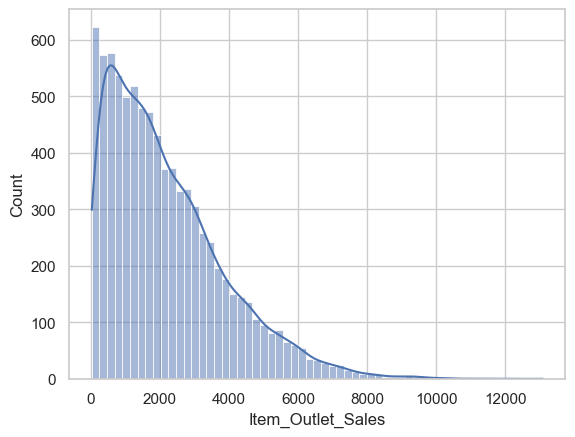

In [103]:
import numpy as np
import matplotlib.pyplot as plt
# Checking the distribution of Item Outlet Sales

# Histogram
sns.histplot(train_cleaned['Item_Outlet_Sales'], kde=True)

# Make plots look nicer
sns.set(style="whitegrid")

As we can see it is right skewed. Lets check if skewness is high.

In [104]:
train_cleaned['Item_Outlet_Sales'].skew()
 #will do log tranformation to reduce skewness

1.1775306028542796

In [105]:
#checking the extreme values >10000 as they are outliers
(train_cleaned['Item_Outlet_Sales'] > 10000).sum()



8

In [106]:
#checking those with zero sales
(train_cleaned['Item_Outlet_Sales'] == 0).sum()

0

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

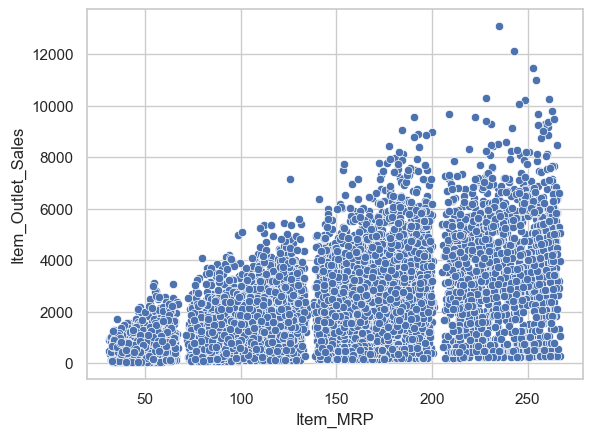

In [107]:
# Clustering based on Price
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train)


### 2.3. Non-Target Variable Analysis

In [108]:
# ---------------------------
# 2. Separate columns by type
# ---------------------------
num_cols = train_cleaned.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train_cleaned.select_dtypes(include=['object']).columns.tolist()

# Remove target variable from num_cols
if 'Item_Outlet_Sales' in num_cols:
    num_cols.remove('Item_Outlet_Sales')

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)


Numerical columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


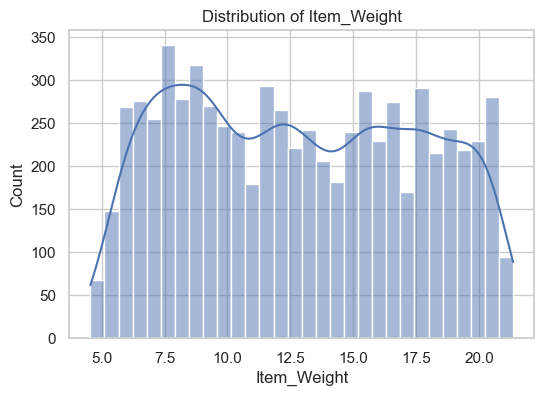

Skewness of Item_Weight: 0.08


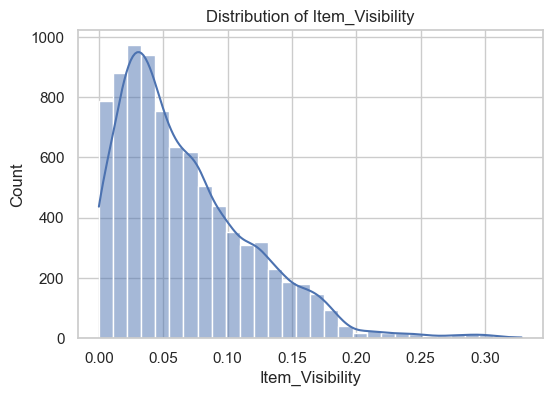

Skewness of Item_Visibility: 1.17


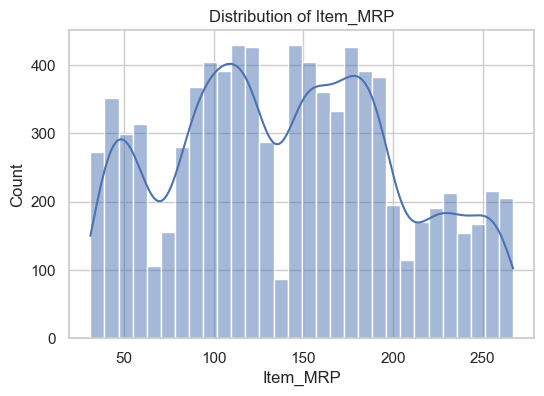

Skewness of Item_MRP: 0.13


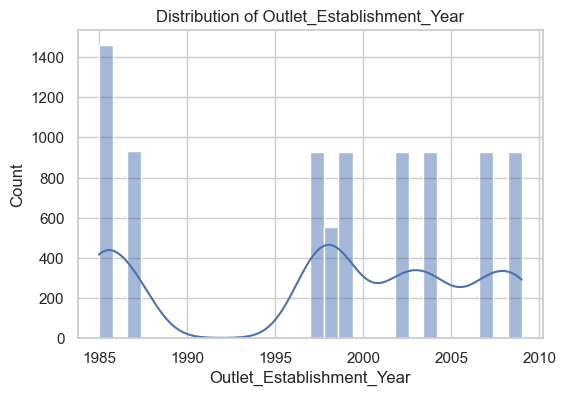

Skewness of Outlet_Establishment_Year: -0.40


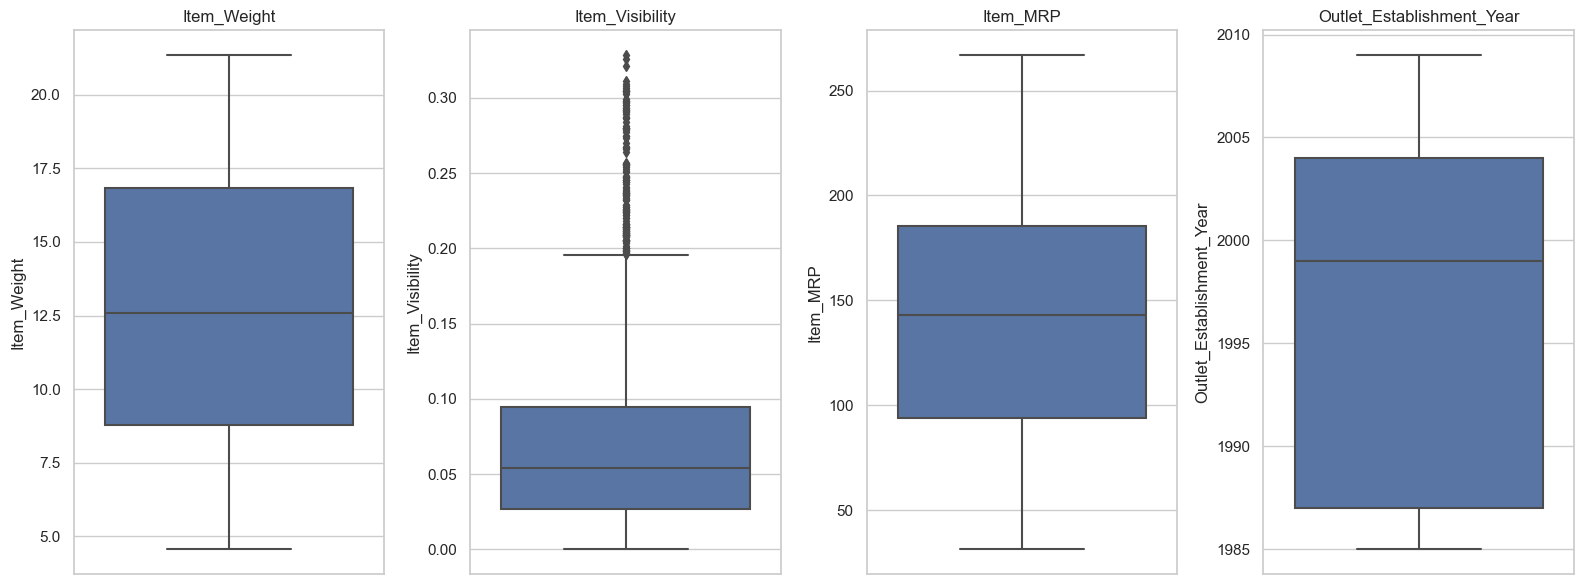

In [109]:

# 3. Numerical Features EDA
# ---------------------------
# Exclude target and Item_Identifier
num_cols = train_cleaned.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [col for col in num_cols if col not in ['Item_Outlet_Sales']]
if 'Item_Identifier' in num_cols:
    num_cols.remove('Item_Identifier')

# Histograms & skewness (still individual for clarity)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()
    skew_val = train_cleaned[col].skew()
    print(f"Skewness of {col}: {skew_val:.2f}")

# Side-by-side boxplots for numerical features
# ---------------------------
num_cols = train_cleaned.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [col for col in num_cols if col not in ['Item_Outlet_Sales', 'Item_Identifier']]

plt.figure(figsize=(4 * len(num_cols), 6))  # width scales with number of plots

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=train_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()



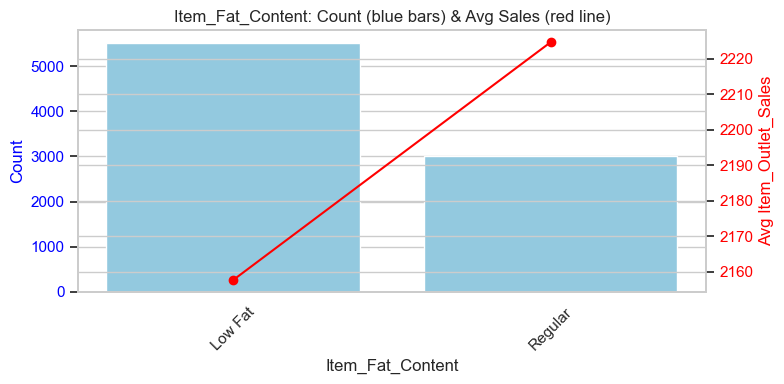

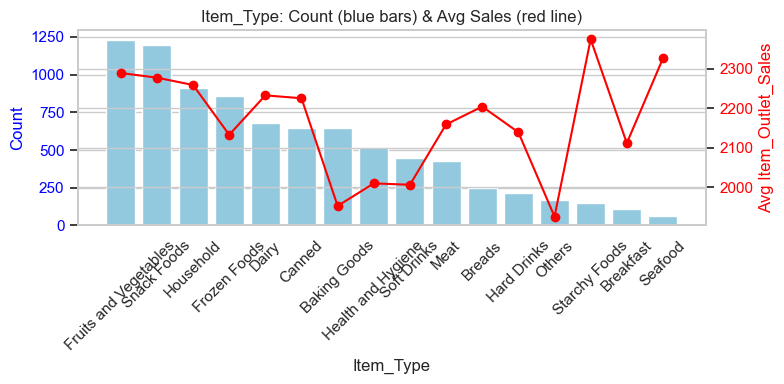

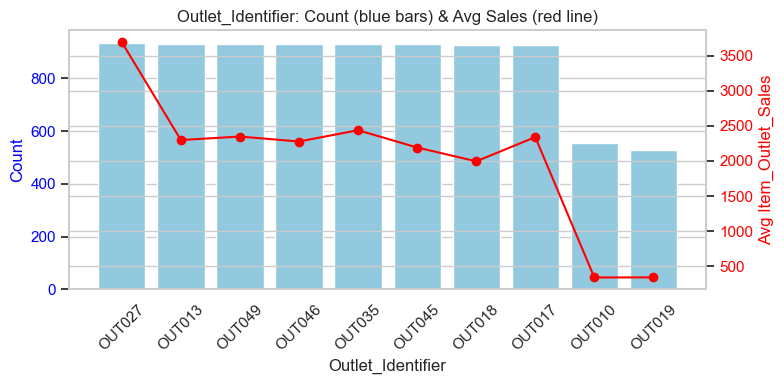

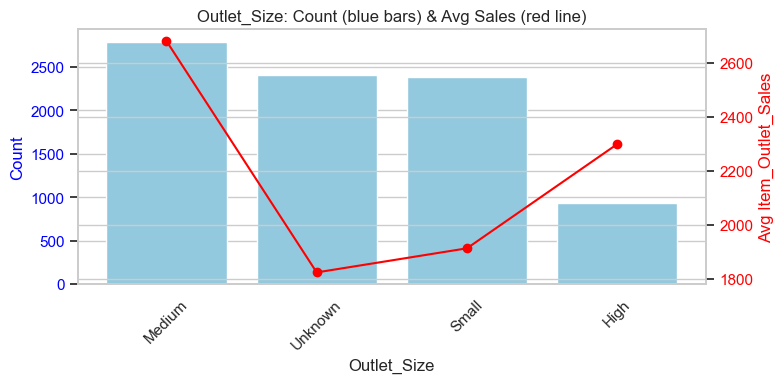

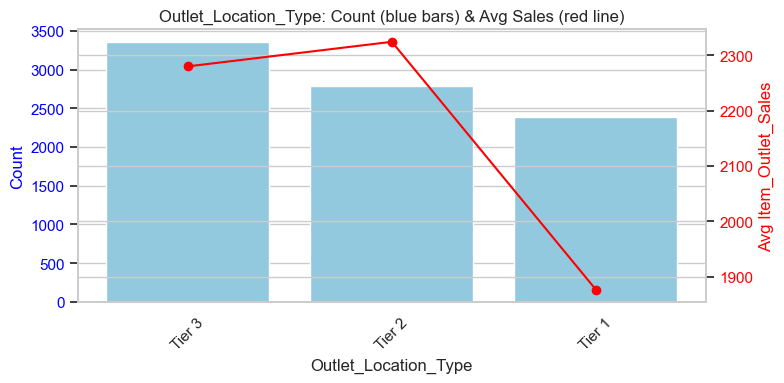

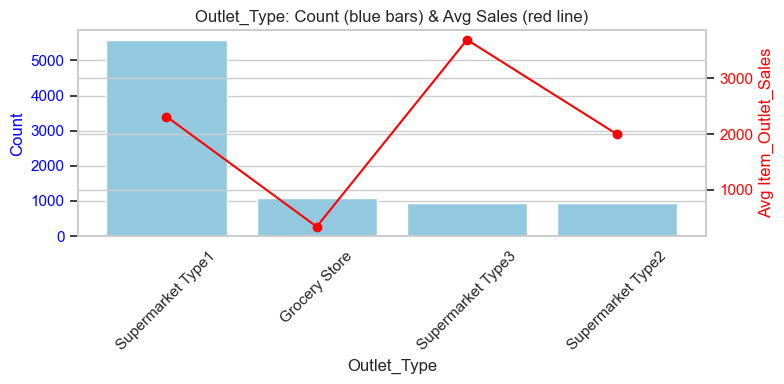

In [110]:
# 4. Categorical Features EDA
# Identify categorical columns (exclude ID columns)
cat_cols = train_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
id_cols = ['Item_Identifier']  # any columns you want to exclude
cat_cols = [col for col in cat_cols if col not in id_cols]

# Plot frequency and average target per category
for col in cat_cols:
    fig, ax1 = plt.subplots(figsize=(8,4))

    # Countplot (frequency)
    sns.countplot(
        x=col, 
        data=train_cleaned, 
        order=train_cleaned[col].value_counts().index, 
        ax=ax1,
        color='skyblue'
    )
    ax1.set_ylabel('Count', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xlabel(col)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    # Create second y-axis for mean target value
    ax2 = ax1.twinx()
    mean_sales = train_cleaned.groupby(col)['Item_Outlet_Sales'].mean().loc[train_cleaned[col].value_counts().index]
    ax2.plot(ax1.get_xticks(), mean_sales, color='red', marker='o')
    ax2.set_ylabel('Avg Item_Outlet_Sales', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f"{col}: Count (blue bars) & Avg Sales (red line)")
    plt.tight_layout()
    plt.show()

## 3. Feature Engineering

In [122]:
# --- Load Raw Data ---
print("Loading raw training and test data...")
train_df = pd.read_csv('train_cleaned.csv')
test_df = pd.read_csv('test_AbJTz2l.csv')

# --- Store Original Identifiers for Submission ---
# It's good practice to save these for the final submission file.
original_test_identifiers = test_df[['Item_Identifier', 'Outlet_Identifier']]

# --- Preprocessing Pipeline for Training Data ---
print("Starting preprocessing for training data...")

# 1. Handle missing values in Item_Weight.
# We'll fill missing Item_Weight values with the mean of the existing values.
train_item_weight_mean = train_df['Item_Weight'].mean()
train_df['Item_Weight'].fillna(train_item_weight_mean, inplace=True)
print("-> Missing 'Item_Weight' values filled.")

# 2. Log transform Item_Visibility.
# Add 1 to handle zero values before applying the log transformation.
train_df['Item_Visibility'] = np.log1p(train_df['Item_Visibility'])
print("-> 'Item_Visibility' log transformed.")

# 3. Binning Item_MRP.
# Create categories for the Item_MRP feature.
bins = [0, 70, 135, 200, np.inf]
labels = [1, 2, 3, 4]
train_df['Item_MRP_Category'] = pd.cut(train_df['Item_MRP'], bins=bins, labels=labels, right=False)
print("-> 'Item_MRP' binned into categories.")

# 4. Create 'Outlet_Years' feature.
# Calculate the age of each outlet.
current_year = 2025
train_df['Outlet_Years'] = current_year - train_df['Outlet_Establishment_Year']
print("-> 'Outlet_Years' feature created.")

# 5. One-hot encode categorical features.
# Convert categorical columns into a format suitable for the model.
categorical_features = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_MRP_Category']
train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)
print("-> Categorical features one-hot encoded.")

# 6. Drop unnecessary columns.
# These columns are either identifiers or have been replaced by new features.
train_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year'], axis=1, inplace=True)
print("-> Unnecessary columns dropped.")

# --- Preprocessing Pipeline for Test Data ---
print("\nStarting preprocessing for test data...")

# 1. Fill missing values in Item_Weight.
# Use the mean from the training data to ensure consistency.
test_df['Item_Weight'].fillna(train_item_weight_mean, inplace=True)
print("-> Missing 'Item_Weight' values filled.")

# 2. Log transform Item_Visibility.
# Apply the same log transformation.
test_df['Item_Visibility'] = np.log1p(test_df['Item_Visibility'])
print("-> 'Item_Visibility' log transformed.")

# 3. Binning Item_MRP.
# Apply the same binning logic.
test_df['Item_MRP_Category'] = pd.cut(test_df['Item_MRP'], bins=bins, labels=labels, right=False)
print("-> 'Item_MRP' binned into categories.")

# 4. Create 'Outlet_Years' feature.
# Apply the same 'Outlet_Years' calculation.
test_df['Outlet_Years'] = current_year - test_df['Outlet_Establishment_Year']
print("-> 'Outlet_Years' feature created.")

# 5. Clean Item_Fat_Content.
# This step is crucial for preventing the feature mismatch error.
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
print("-> 'Item_Fat_Content' cleaned.")

# 6. Handle missing Outlet_Size values.
# Fill with 'Unknown' to match the training data's categories.
test_df['Outlet_Size'].fillna('Unknown', inplace=True)
print("-> Missing 'Outlet_Size' values filled with 'Unknown'.")

# 7. One-hot encode categorical features.
# Apply one-hot encoding to the same columns as the training data.
test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)
print("-> Categorical features one-hot encoded.")

# 8. Drop unnecessary columns.
test_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year'], axis=1, inplace=True)
print("-> Unnecessary columns dropped.")

# --- Align Columns ---
# This is a critical step to ensure both dataframes have the exact same columns
# after one-hot encoding, even if a category is missing in one of them.
print("\nAligning columns between training and test dataframes...")
X_train_cols = train_df.drop('Item_Outlet_Sales', axis=1).columns
test_df = test_df.reindex(columns=X_train_cols, fill_value=0)
print("-> Columns aligned successfully.")

# --- Save Preprocessed Data to CSV files ---
# Saving the preprocessed dataframes for future use.
print("\nSaving preprocessed data to CSV files...")
train_df.to_csv('preprocessed_train.csv', index=False)
test_df.to_csv('preprocessed_test.csv', index=False)
print("-> 'preprocessed_train.csv' and 'preprocessed_test.csv' saved successfully!")

Loading raw training and test data...
Starting preprocessing for training data...
-> Missing 'Item_Weight' values filled.
-> 'Item_Visibility' log transformed.
-> 'Item_MRP' binned into categories.
-> 'Outlet_Years' feature created.
-> Categorical features one-hot encoded.
-> Unnecessary columns dropped.

Starting preprocessing for test data...
-> Missing 'Item_Weight' values filled.
-> 'Item_Visibility' log transformed.
-> 'Item_MRP' binned into categories.
-> 'Outlet_Years' feature created.
-> 'Item_Fat_Content' cleaned.
-> Missing 'Outlet_Size' values filled with 'Unknown'.
-> Categorical features one-hot encoded.
-> Unnecessary columns dropped.

Aligning columns between training and test dataframes...
-> Columns aligned successfully.

Saving preprocessed data to CSV files...
-> 'preprocessed_train.csv' and 'preprocessed_test.csv' saved successfully!


## 4.Model Fitting

In [123]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# --- Load Preprocessed Data ---
# We are loading the preprocessed data that was saved in the previous step.
# This ensures a clean and consistent starting point for model training.
print("Loading preprocessed training and test data...")
train_df = pd.read_csv('preprocessed_train.csv')
test_df = pd.read_csv('preprocessed_test.csv')

# Also load the original test identifiers to build the submission file
original_test_identifiers = pd.read_csv('test_AbJTz2l.csv')[['Item_Identifier', 'Outlet_Identifier']]

# --- Define Features and Target ---
# 'Item_Outlet_Sales' is our target variable, and the log-transformed version
# 'Item_Outlet_Sales_log' is what we will train the model on.
# All other columns are our features for the model.
X_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales']

# For a regression problem with a highly skewed target variable like BigMart Sales,
# it is common to log-transform the target variable to stabilize its variance and
# make its distribution more Gaussian-like. This often helps the model to perform
# better and produce more reliable predictions.
# We will use this log-transformed target for training.
y_train_log = np.log1p(y_train)


# --- Model Training with XGBoost ---
print("\nStarting XGBoost model training...")

# Instantiate the XGBoost Regressor model.
# The parameters below are a solid starting point for this type of problem.
# - objective: 'reg:squarederror' is the standard objective for regression problems.
# - n_estimators: The number of boosting rounds or trees to build.
# - learning_rate: Controls the step size shrinkage to prevent overfitting.
# - max_depth: The maximum depth of a tree.
# - gamma: Minimum loss reduction required to make a further partition on a leaf node.
# - subsample: Fraction of samples to be randomly sampled for each tree.
# - colsample_bytree: Fraction of features to be randomly sampled for each tree.
# - reg_alpha: L1 regularization term on weights.
# - random_state: For reproducibility.
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the training data.
xgb_reg.fit(X_train, y_train_log)
print("Model training complete.")

# --- Make Predictions on Test Data ---
print("\nMaking predictions on the test data...")

# The model expects the test data to have the same columns as the training data.
# We will drop the target variable from the test data to prepare it for prediction.
# Note: This step might be redundant if the preprocessed test data was saved without
# the target variable, but it's a good practice to ensure it's not present.
if 'Item_Outlet_Sales' in test_df.columns:
    test_df = test_df.drop('Item_Outlet_Sales', axis=1)

# Make predictions using the trained model. The predictions will be on the
# log-transformed scale.
test_predictions_log = xgb_reg.predict(test_df)

# --- Inverse Transform Predictions ---
# We need to transform the predictions back to the original scale of 'Item_Outlet_Sales'
# using the inverse of the log1p function, which is np.expm1.
test_predictions = np.expm1(test_predictions_log)
print("Predictions generated.")

# --- Create Submission File ---
# The submission file requires the original identifiers and the final predictions.
print("\nCreating submission file 'submission.csv'...")
submission = pd.DataFrame({
    'Item_Identifier': original_test_identifiers['Item_Identifier'],
    'Outlet_Identifier': original_test_identifiers['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})

# Save the submission file without the index.
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully!")

Loading preprocessed training and test data...

Starting XGBoost model training...
Model training complete.

Making predictions on the test data...
Predictions generated.

Creating submission file 'submission.csv'...
Submission file 'submission.csv' created successfully!


## 5. Hyperparameter Tuning

In [127]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# --- Load Preprocessed Data ---
# Loading the preprocessed data that was saved in the previous step.
# This ensures a clean and consistent starting point for model training.
print("Loading preprocessed training and test data...")
train_df = pd.read_csv('preprocessed_train.csv')
test_df = pd.read_csv('preprocessed_test.csv')

# Also load the original test identifiers to build the submission file.
original_test_identifiers = pd.read_csv('test_AbJTz2l.csv')[['Item_Identifier', 'Outlet_Identifier']]

# --- Define Features and Target ---
# 'Item_Outlet_Sales' is our target variable. We will use the log-transformed
# version for training the model.
# FIX: The log-transformed column needs to be created after loading the file.
y_train_log = np.log1p(train_df['Item_Outlet_Sales'])
X_train = train_df.drop(['Item_Outlet_Sales'], axis=1)
y_train = y_train_log

# Preprocess the test data to align with the training data.
# The log-transformed column should not exist in the test data.
# The original drop call was incorrect and has been removed.

# --- Hyperparameter Tuning with GridSearchCV ---
print("\nStarting hyperparameter tuning using GridSearchCV...")

# Instantiate the XGBoost Regressor model with some default parameters.
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)

# Define the parameter grid to search.
# We'll tune a few key parameters that often have a big impact on performance.
# A small grid is used here to ensure the process completes in a reasonable amount of time.
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
}

# Set up GridSearchCV.
# cv=3 specifies 3-fold cross-validation.
# verbose=2 provides detailed output during the search.
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search to the data. This will perform the cross-validation
# and find the best combination of parameters.
grid_search.fit(X_train, y_train)

# Print the best parameters found by the search.
print("\nBest parameters found: ", grid_search.best_params_)

# --- Make Predictions with the Best Model ---
print("\nMaking predictions on the test data with the best model...")

# Use the best_estimator_ from the grid search to make predictions.
best_xgb_model = grid_search.best_estimator_
test_predictions_log = best_xgb_model.predict(test_df)

# Inverse transform the predictions back to the original scale of 'Item_Outlet_Sales'.
test_predictions = np.expm1(test_predictions_log)
print("Predictions generated.")

# --- Create Submission File ---
# The submission file requires the original identifiers and the final predictions.
print("\nCreating new submission file 'submission_tuned.csv'...")
submission = pd.DataFrame({
    'Item_Identifier': original_test_identifiers['Item_Identifier'],
    'Outlet_Identifier': original_test_identifiers['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})

# Save the submission file without the index.
submission.to_csv('submission_tuned.csv', index=False)
print("Submission file 'submission_tuned.csv' created successfully!")


Loading preprocessed training and test data...

Starting hyperparameter tuning using GridSearchCV...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Making predictions on the test data with the best model...
Predictions generated.

Creating new submission file 'submission_tuned.csv'...
Submission file 'submission_tuned.csv' created successfully!


## 6. Creating New Preprocessed Train & Test Datasets

In [128]:
# --- Load Raw Data ---
print("Loading raw training and test data...")
train_df = pd.read_csv('train_cleaned.csv')
test_df = pd.read_csv('test_AbJTz2l.csv')

# --- Store Original Identifiers for Submission ---
# It's good practice to save these for the final submission file.
original_test_identifiers = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()

# --- Preprocessing Pipeline for Training Data ---
print("Starting preprocessing for training data...")

# NEW STEP: Drop outliers from the training data based on 'Item_Outlet_Sales'
# We are removing rows where sales are greater than 10000, as requested.
print("-> Dropping rows with 'Item_Outlet_Sales' > 10000...")
train_df = train_df[train_df['Item_Outlet_Sales'] <= 10000]

# 1. Handle missing values in Item_Weight.
# We'll fill missing Item_Weight values with the mean of the existing values.
train_item_weight_mean = train_df['Item_Weight'].mean()
train_df['Item_Weight'].fillna(train_item_weight_mean, inplace=True)
print("-> Missing 'Item_Weight' values filled.")

# 2. Log transform Item_Visibility.
# Add 1 to handle zero values before applying the log transformation.
train_df['Item_Visibility'] = np.log1p(train_df['Item_Visibility'])
print("-> 'Item_Visibility' log transformed.")

# 3. Binning Item_MRP.
# Create categories for the Item_MRP feature.
mrp_bins = [0, 70, 135, 200, np.inf]
mrp_labels = [1, 2, 3, 4]
train_df['Item_MRP_Category'] = pd.cut(train_df['Item_MRP'], bins=mrp_bins, labels=mrp_labels, right=False)
print("-> 'Item_MRP' binned into categories.")

# 4. Create 'Outlet_Years' feature.
# Calculate the age of each outlet.
current_year = 2025
train_df['Outlet_Years'] = current_year - train_df['Outlet_Establishment_Year']
print("-> 'Outlet_Years' feature created.")

# 5. NEW FEATURE: Create a combined Item Type feature
# This reduces the number of categories from 'Item_Type' which has 16 values.
train_df['Item_Type_Combined'] = train_df['Item_Identifier'].apply(lambda x: x[:2])
train_df['Item_Type_Combined'] = train_df['Item_Type_Combined'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
print("-> New 'Item_Type_Combined' feature created.")

# 6. One-hot encode categorical features.
# Convert categorical columns into a format suitable for the model. We are including the new feature.
categorical_features = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_MRP_Category', 'Item_Type_Combined']
train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)
print("-> Categorical features one-hot encoded.")

# 7. Drop unnecessary columns.
# These columns are either identifiers or have been replaced by new features.
train_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year'], axis=1, inplace=True)
print("-> Unnecessary columns dropped.")


# --- Preprocessing Pipeline for Test Data ---
print("\nStarting preprocessing for test data...")

# 1. Fill missing values in Item_Weight.
# Use the mean from the training data to ensure consistency.
test_df['Item_Weight'].fillna(train_item_weight_mean, inplace=True)
print("-> Missing 'Item_Weight' values filled.")

# 2. Log transform Item_Visibility.
# Apply the same log transformation.
test_df['Item_Visibility'] = np.log1p(test_df['Item_Visibility'])
print("-> 'Item_Visibility' log transformed.")

# 3. Binning Item_MRP.
# Apply the same binning logic.
test_df['Item_MRP_Category'] = pd.cut(test_df['Item_MRP'], bins=mrp_bins, labels=mrp_labels, right=False)
print("-> 'Item_MRP' binned into categories.")

# 4. Create 'Outlet_Years' feature.
# Apply the same 'Outlet_Years' calculation.
test_df['Outlet_Years'] = current_year - test_df['Outlet_Establishment_Year']
print("-> 'Outlet_Years' feature created.")

# 5. NEW FEATURE: Create a combined Item Type feature
test_df['Item_Type_Combined'] = test_df['Item_Identifier'].apply(lambda x: x[:2])
test_df['Item_Type_Combined'] = test_df['Item_Type_Combined'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
print("-> New 'Item_Type_Combined' feature created.")

# 6. Clean Item_Fat_Content.
# This step is crucial for preventing the feature mismatch error.
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
print("-> 'Item_Fat_Content' cleaned.")

# 7. Handle missing Outlet_Size values.
# Fill with 'Unknown' to match the training data's categories.
test_df['Outlet_Size'].fillna('Unknown', inplace=True)
print("-> Missing 'Outlet_Size' values filled with 'Unknown'.")

# 8. One-hot encode categorical features.
# Apply one-hot encoding to the same columns as the training data.
test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)
print("-> Categorical features one-hot encoded.")

# 9. Drop unnecessary columns.
test_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year'], axis=1, inplace=True)
print("-> Unnecessary columns dropped.")

# --- Align Columns ---
# This is a critical step to ensure both dataframes have the exact same columns
# after one-hot encoding, even if a category is missing in one of them.
print("\nAligning columns between training and test dataframes...")
X_train_cols = train_df.drop('Item_Outlet_Sales', axis=1).columns
test_df = test_df.reindex(columns=X_train_cols, fill_value=0)
print("-> Columns aligned successfully.")

# --- Save Preprocessed Data to CSV files ---
# Saving the preprocessed dataframes for future use.
print("\nSaving preprocessed data to CSV files...")
train_df.to_csv('preprocessed_train_v2.csv', index=False)
test_df.to_csv('preprocessed_test_v2.csv', index=False)
print("-> 'preprocessed_train_v2.csv' and 'preprocessed_test_v2.csv' saved successfully!")

print("\nData preprocessing is complete.")


Loading raw training and test data...
Starting preprocessing for training data...
-> Dropping rows with 'Item_Outlet_Sales' > 10000...
-> Missing 'Item_Weight' values filled.
-> 'Item_Visibility' log transformed.
-> 'Item_MRP' binned into categories.
-> 'Outlet_Years' feature created.
-> New 'Item_Type_Combined' feature created.
-> Categorical features one-hot encoded.
-> Unnecessary columns dropped.

Starting preprocessing for test data...
-> Missing 'Item_Weight' values filled.
-> 'Item_Visibility' log transformed.
-> 'Item_MRP' binned into categories.
-> 'Outlet_Years' feature created.
-> New 'Item_Type_Combined' feature created.
-> 'Item_Fat_Content' cleaned.
-> Missing 'Outlet_Size' values filled with 'Unknown'.
-> Categorical features one-hot encoded.
-> Unnecessary columns dropped.

Aligning columns between training and test dataframes...
-> Columns aligned successfully.

Saving preprocessed data to CSV files...
-> 'preprocessed_train_v2.csv' and 'preprocessed_test_v2.csv' saved

## 7. Model Fitting Version 2

In [129]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# --- Load Preprocessed Data ---
# We are loading the new, enhanced preprocessed data.
print("Loading enhanced preprocessed training and test data...")
train_df = pd.read_csv('preprocessed_train_v2.csv')
test_df = pd.read_csv('preprocessed_test_v2.csv')

# Also load the original test identifiers to build the submission file.
# This ensures we have the correct identifiers for the final output.
original_test_identifiers = pd.read_csv('test_AbJTz2l.csv')[['Item_Identifier', 'Outlet_Identifier']]

# --- Define Features and Target ---
# 'Item_Outlet_Sales' is our target variable. We will log-transform it
# to handle the skewed distribution, which often improves model performance.
y_train_log = np.log1p(train_df['Item_Outlet_Sales'])
X_train = train_df.drop('Item_Outlet_Sales', axis=1)

# The test data is already preprocessed and ready for prediction.
X_test = test_df.copy()

# --- Model Training with XGBoost ---
print("\nStarting XGBoost model training on enhanced data...")

# Instantiate the XGBoost Regressor with a good set of starting parameters.
# These parameters are a solid baseline for a regression problem.
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the training data with the log-transformed target.
xgb_reg.fit(X_train, y_train_log)
print("Model training complete.")

# --- Make Predictions on Test Data ---
print("\nMaking predictions on the test data...")

# Make predictions on the preprocessed test data. The predictions will be
# on the log-transformed scale.
test_predictions_log = xgb_reg.predict(X_test)

# --- Inverse Transform Predictions ---
# We need to transform the predictions back to the original sales scale
# using the inverse of the log1p function, which is np.expm1.
test_predictions = np.expm1(test_predictions_log)
print("Predictions generated.")

# --- Create Submission File ---
# The submission file requires the original identifiers and the final predictions.
print("\nCreating new submission file 'submission_v2.csv'...")
submission = pd.DataFrame({
    'Item_Identifier': original_test_identifiers['Item_Identifier'],
    'Outlet_Identifier': original_test_identifiers['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})

# Save the submission file without the index.
submission.to_csv('submission_v2.csv', index=False)
print("Submission file 'submission_v2.csv' created successfully!")

Loading enhanced preprocessed training and test data...

Starting XGBoost model training on enhanced data...
Model training complete.

Making predictions on the test data...
Predictions generated.

Creating new submission file 'submission_v2.csv'...
Submission file 'submission_v2.csv' created successfully!


## 8. Hyperparameter Tunning Version 2 

In [130]:
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

# --- Load Preprocessed Data ---
# We are loading the new, enhanced preprocessed data.
print("Loading enhanced preprocessed training and test data...")
train_df = pd.read_csv('preprocessed_train_v2.csv')
test_df = pd.read_csv('preprocessed_test_v2.csv')

# Also load the original test identifiers to build the submission file.
# This ensures we have the correct identifiers for the final output.
original_test_identifiers = pd.read_csv('test_AbJTz2l.csv')[['Item_Identifier', 'Outlet_Identifier']]

# --- Define Features and Target ---
# 'Item_Outlet_Sales' is our target variable. We will log-transform it
# to handle the skewed distribution, which often improves model performance.
y_train_log = np.log1p(train_df['Item_Outlet_Sales'])
X_train = train_df.drop('Item_Outlet_Sales', axis=1)

# The test data is already preprocessed and ready for prediction.
X_test = test_df.copy()

# --- Hyperparameter Tuning with GridSearchCV ---
print("\nStarting hyperparameter tuning using GridSearchCV...")

# Instantiate the XGBoost Regressor model.
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)

# Define the parameter grid to search.
# We'll tune a few key parameters that often have a big impact on performance.
# A small grid is used here to ensure the process completes in a reasonable amount of time.
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'gamma': [0, 0.2, 0.4]
}

# Set up GridSearchCV.
# cv=3 specifies 3-fold cross-validation.
# verbose=2 provides detailed output during the search.
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search to the data. This will perform the cross-validation
# and find the best combination of parameters.
grid_search.fit(X_train, y_train_log)

# Print the best parameters found by the search.
print("\nBest parameters found: ", grid_search.best_params_)
print(f"\nBest cross-validation score (negative mean squared error): {grid_search.best_score_}")

# --- Make Predictions with the Best Model ---
print("\nMaking predictions on the test data with the best model...")

# Use the best_estimator_ from the grid search to make predictions.
best_xgb_model = grid_search.best_estimator_
test_predictions_log = best_xgb_model.predict(X_test)

# Inverse transform the predictions back to the original scale of 'Item_Outlet_Sales'.
test_predictions = np.expm1(test_predictions_log)
print("Predictions generated.")

# --- Create Submission File ---
# The submission file requires the original identifiers and the final predictions.
print("\nCreating new submission file 'submission_tuned_v2.csv'...")
submission = pd.DataFrame({
    'Item_Identifier': original_test_identifiers['Item_Identifier'],
    'Outlet_Identifier': original_test_identifiers['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})

# Save the submission file without the index.
submission.to_csv('submission_tuned_v2.csv', index=False)
print("Submission file 'submission_tuned_v2.csv' created successfully!")


Loading enhanced preprocessed training and test data...

Starting hyperparameter tuning using GridSearchCV...
Fitting 3 folds for each of 243 candidates, totalling 729 fits

Best parameters found:  {'gamma': 0.4, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}

Best cross-validation score (negative mean squared error): -0.2891024139451632

Making predictions on the test data with the best model...
Predictions generated.

Creating new submission file 'submission_tuned_v2.csv'...
Submission file 'submission_tuned_v2.csv' created successfully!


## 9. Hyperparameter Tuning Version 2 with more parameters

In [131]:
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

# --- Load Preprocessed Data ---
# We are loading the new, enhanced preprocessed data.
print("Loading enhanced preprocessed training and test data...")
train_df = pd.read_csv('preprocessed_train_v2.csv')
test_df = pd.read_csv('preprocessed_test_v2.csv')

# Also load the original test identifiers to build the submission file.
# This ensures we have the correct identifiers for the final output.
original_test_identifiers = pd.read_csv('test_AbJTz2l.csv')[['Item_Identifier', 'Outlet_Identifier']]

# --- Define Features and Target ---
# 'Item_Outlet_Sales' is our target variable. We will log-transform it
# to handle the skewed distribution, which often improves model performance.
y_train_log = np.log1p(train_df['Item_Outlet_Sales'])
X_train = train_df.drop('Item_Outlet_Sales', axis=1)

# The test data is already preprocessed and ready for prediction.
X_test = test_df.copy()

# --- Hyperparameter Tuning with GridSearchCV ---
print("\nStarting hyperparameter tuning using GridSearchCV...")

# Instantiate the XGBoost Regressor model.
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)

# Define the parameter grid to search.
# We are expanding the search space with a wider range of values for existing parameters
# and adding new ones to find a better, more accurate model.
param_grid = {
    # Number of boosting rounds. A higher number can lead to better performance
    # but also increases the risk of overfitting and training time.
    'n_estimators': [500, 1000, 2000],
    # Maximum depth of a tree. Increasing this can make the model more complex.
    'max_depth': [3, 5, 7, 9],
    # Step size shrinkage to prevent overfitting.
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    # Subsample ratio of the training instance.
    'subsample': [0.6, 0.8, 1.0],
    # Minimum loss reduction required to make a split.
    'gamma': [0, 0.1, 0.2],
    # Minimum sum of instance weight needed in a child.
    'min_child_weight': [1, 5, 10],
    # Subsample ratio of columns when constructing each tree.
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up GridSearchCV.
# We are increasing the number of cross-validation folds from 3 to 5.
# This provides a more robust estimate of the model's performance.
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, # Increased folds for more robust validation
    verbose=3, # Increased verbosity for more detailed output
    n_jobs=-1
)

# Fit the grid search to the data. This will perform the cross-validation
# and find the best combination of parameters.
grid_search.fit(X_train, y_train_log)

# Print the best parameters found by the search.
print("\nBest parameters found: ", grid_search.best_params_)
print(f"\nBest cross-validation score (negative mean squared error): {grid_search.best_score_}")

# --- Make Predictions with the Best Model ---
print("\nMaking predictions on the test data with the best model...")

# Use the best_estimator_ from the grid search to make predictions.
best_xgb_model = grid_search.best_estimator_
test_predictions_log = best_xgb_model.predict(X_test)

# Inverse transform the predictions back to the original scale of 'Item_Outlet_Sales'.
test_predictions = np.expm1(test_predictions_log)
print("Predictions generated.")

# --- Create Submission File ---
# The submission file requires the original identifiers and the final predictions.
print("\nCreating new submission file 'submission_tuned_v2.csv'...")
submission = pd.DataFrame({
    'Item_Identifier': original_test_identifiers['Item_Identifier'],
    'Outlet_Identifier': original_test_identifiers['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})

# Save the submission file without the index.
submission.to_csv('submission_tuned_v2.csv', index=False)
print("Submission file 'submission_tuned_v2.csv' created successfully!")

Loading enhanced preprocessed training and test data...

Starting hyperparameter tuning using GridSearchCV...
Fitting 5 folds for each of 3888 candidates, totalling 19440 fits

Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 2000, 'subsample': 1.0}

Best cross-validation score (negative mean squared error): -0.28808735610476577

Making predictions on the test data with the best model...
Predictions generated.

Creating new submission file 'submission_tuned_v2.csv'...
Submission file 'submission_tuned_v2.csv' created successfully!
